![logo](../Data/JFM-notebooks-logo.jpg)

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r"\usepackage{amsmath}")
plt.rc('font', family='serif')

In [4]:
# Loading in datasets
ds_lp = xr.open_dataset('../Data/solver_lowpass_x_t_omega_2_Nint_100_strat_3_T_40_Ttotal_59.8.nc')

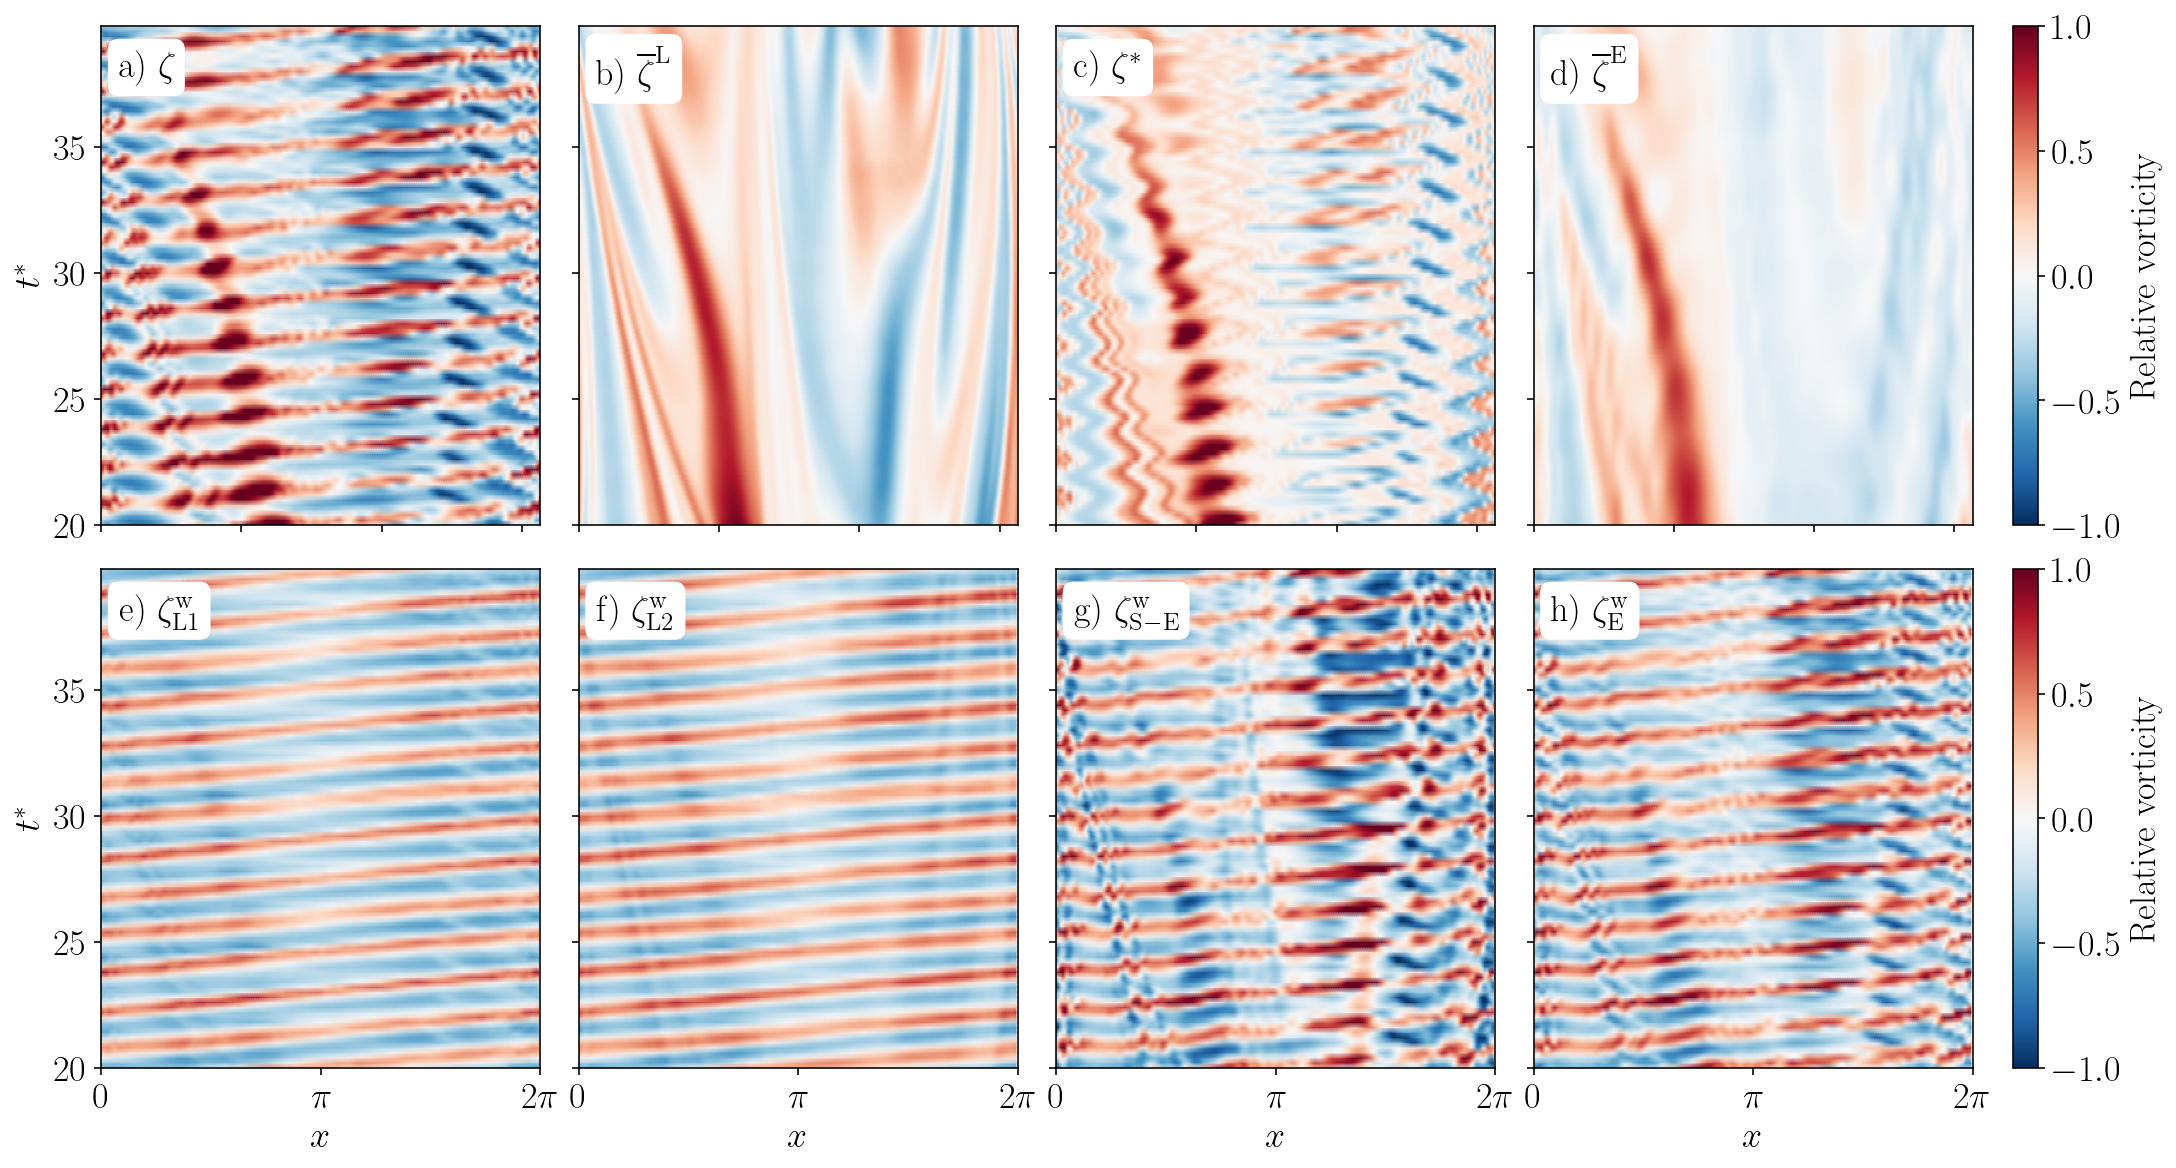

In [5]:
# Initialising figure
fig, axes = plt.subplots(2,4, figsize = (15,8),constrained_layout=True)

# Plotting
vmin = -1
vmax = 1
p0 = axes[0,0].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_inst,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
axes[0,1].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
axes[0,2].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_LM_at_mid,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
axes[0,3].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')

axes[1,0].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_inst - ds_lp.z_LM_at_mid,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
axes[1,1].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_inst_at_mean - ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
axes[1,2].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_inst - ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
axes[1,3].pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_inst - ds_lp.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')

fig.colorbar(p0,ax=axes[0,3],label='Relative vorticity')
fig.colorbar(p0,ax=axes[1,3],label='Relative vorticity')

textposx = 0.25
textposy = 37.8
bbox=dict(facecolor='white', edgecolor='none', boxstyle='round')

axes[0,0].text(textposx,textposy,r'a) $\zeta$',bbox=bbox)
axes[0,1].text(textposx,textposy-0.3,r'b) $\overline{\zeta}^\mathrm{L}$',bbox=bbox)
axes[0,2].text(textposx,textposy,r'c) $\zeta^*$',bbox=bbox)
axes[0,3].text(textposx,textposy-0.3,r'd) $\overline{\zeta}^\mathrm{E}$',bbox=bbox)
axes[1,0].text(textposx,textposy,r'e) $\zeta_{\mathrm{L1}}^\mathrm{w}$',bbox=bbox)
axes[1,1].text(textposx,textposy,r'f) $\zeta_{\mathrm{L2}}^\mathrm{w}$',bbox=bbox)
axes[1,2].text(textposx,textposy,r'g) $\zeta_{\mathrm{S-E}}^\mathrm{w}$',bbox=bbox)
axes[1,3].text(textposx,textposy,r'h) $\zeta_{\mathrm{E}}^\mathrm{w}$',bbox=bbox)

# Formatting
[axes[i,j].axes.set_yticklabels([]) for i in range(2) for j in range(1,4)];
[axes[i,j].axes.set_xticklabels([]) for i in range(1) for j in range(4)];
[axes[i,0].set_ylabel(r'$t^*$') for i in range(2)];
[axes[1,j].set_xlabel(r'$x$') for j in range(4)];

[axes[1,j].set_xticks([0,np.pi,2*np.pi]) for j in range(4)];
labels = ['0','$\pi$','$2\pi$']
[axes[1,j].set_xticklabels(labels) for j in range(4)];

fig.savefig('Figure-6.png',dpi=200,bbox_inches='tight')

Hovmöller (space-time) diagrams of vorticity: a) instantaneous, b) Lagrangian low-pass , c) Lagrangian low-pass  at the trajectory midpoint, d) Eulerian low-pass, e) Lagrangian L1 wave, f) Lagrangian L2 wave, g) semi-Eulerian wave, and h) Eulerian wave. Strategy 3 is used to solve for the Lagrangian means at a temporal resolution of 0.2. Parameters are identical to figure 2.

More data variables are available in the xarray datasets:

In [6]:
ds_lp

<xarray.Dataset>
Dimensions:         (x: 256, t: 100)
Coordinates:
  * x               (x) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
  * t               (t) float64 20.0 20.2 20.4 20.6 20.8 ... 39.2 39.4 39.6 39.8
    y               float64 ...
Data variables:
    z_inst          (t, x) float64 -0.3126 -0.5 -0.6376 ... -0.4035 -0.3782
    z_EM            (t, x) float64 0.1638 0.162 0.1552 ... -0.1046 -0.1017
    z_inst_at_end   (t, x) float64 ...
    z_LM_at_mid     (t, x) float64 0.224 0.04242 -0.1011 ... -0.05495 -0.01308
    z_LM_at_end     (t, x) float64 ...
    Xi31_x          (t, x) float64 ...
    Xi31_y          (t, x) float64 ...
    z_inst_at_mean  (t, x) float64 ...
    z_LM_at_mean    (t, x) float64 0.4263 0.2616 0.05574 ... -0.005384 -0.09303
    Xi32_x          (t, x) float64 ...
    Xi32_y          (t, x) float64 ...
    timestep        (t) int32 ...
Attributes:
    description:  SW GLM solver outputs